In [2]:
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
# CORRECT PATH: 'data/u.data' (assuming jupyter is run from the root)
# CORRECT SEPARATOR: '\t' (tab character)
df = pd.read_csv('../data/u.data', sep='\t', names=column_names, encoding='latin-1')

print("Data loaded successfully!")
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()
print(f"\nUnique Users: {df['user_id'].nunique()}")
print(f"Unique Items: {df['item_id'].nunique()}")

Data loaded successfully!
DataFrame Head:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Unique Users: 943
Unique Items: 1682


In [3]:
import os
print(os.getcwd())  # shows where Python is currently running
print(os.listdir()) # shows all files/folders here


C:\Users\Win\ai-ecom-recommender\notebooks
['.ipynb_checkpoints', '1.0_EDA_and_Modeling.ipynb']



Rating Distribution:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


<Axes: >

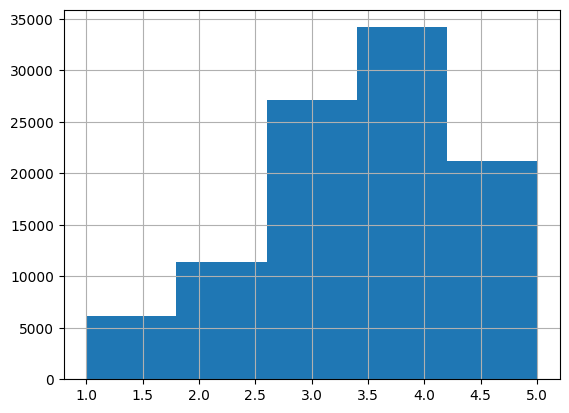

In [4]:
print("\nRating Distribution:")
print(df['rating'].value_counts().sort_index())
df['rating'].hist(bins=5) # Visualize the distribution (optional but recommended)

In [5]:
# Run only if 'timestamp' column exists
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
print(df.head())

   user_id  item_id  rating  timestamp                date
0      196      242       3  881250949 1997-12-04 15:55:49
1      186      302       3  891717742 1998-04-04 19:22:22
2       22      377       1  878887116 1997-11-07 07:18:36
3      244       51       2  880606923 1997-11-27 05:02:03
4      166      346       1  886397596 1998-02-02 05:33:16


In [6]:
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp'] # Verify your column names here
file_path = '../data/u.data' # Verify your file path here

# Execute this cell first!
df = pd.read_csv(file_path, sep='\t', names=column_names, encoding='latin-1')

print("DataFrame reloaded successfully.")

DataFrame reloaded successfully.


In [7]:
df = df.drop(columns=['timestamp'])

In [8]:
# Map User IDs
user_map = {id: i for i, id in enumerate(df['user_id'].unique())}
df['user_mapped'] = df['user_id'].map(user_map)

# Map Item IDs
item_map = {id: i for i, id in enumerate(df['item_id'].unique())}
df['item_mapped'] = df['item_id'].map(item_map)

# Print to verify the first few mapped IDs
print("\nMapping complete. Sample Mapped Data:")
print(df[['user_id', 'user_mapped', 'item_id', 'item_mapped']].head())


Mapping complete. Sample Mapped Data:
   user_id  user_mapped  item_id  item_mapped
0      196            0      242            0
1      186            1      302            1
2       22            2      377            2
3      244            3       51            3
4      166            4      346            4


In [9]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
from scipy.sparse import csr_matrix

# Create the sparse matrix (Rows=Users, Columns=Items, Data=Ratings)
user_item_matrix = csr_matrix((
    df['rating'].values,
    (df['user_mapped'].values, df['item_mapped'].values)
))
print("\nUser-Item Matrix Shape:", user_item_matrix.shape)


User-Item Matrix Shape: (943, 1682)


In [13]:
# CODE TO TRAIN THE MODEL (for Day 2)

from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix # Ensure this is imported if you haven't yet
# (Note: This assumes your user_item_matrix variable is correctly loaded/defined 
# in the cells above this one)

print("Starting KNN Model Training...")

# 1. Define the model (using cosine similarity for distance calculation)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# 2. Train the model using the sparse user-item interaction matrix
# WARNING: If your user_item_matrix is not defined, this cell will fail.
model_knn.fit(user_item_matrix)

print("KNN Model trained successfully!")

Starting KNN Model Training...
KNN Model trained successfully!


In [14]:
import pickle

# Assuming SAVE_PATH is correctly defined as '../src/api/'
SAVE_PATH = '../src/api/' 

# 1. Save the trained model using Protocol 4 
with open(SAVE_PATH + 'knn_model.pkl', 'wb') as f:
    pickle.dump(model_knn, f, protocol=4) # model_knn must be in memory

# 2. Save the item mapping
with open(SAVE_PATH + 'item_map.pkl', 'wb') as f:
    pickle.dump(item_map, f, protocol=4)

# 3. Save the user mapping
with open(SAVE_PATH + 'user_map.pkl', 'wb') as f:
    pickle.dump(user_map, f, protocol=4)

print("Model and mappings SUCCESSFULLY RESAVED with Protocol 4.")

Model and mappings SUCCESSFULLY RESAVED with Protocol 4.


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
